In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import pickle, joblib

# some nlp lib
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
# reading the data from the file
x , y = [] , []
with open ("/content/SMSSpamCollection.txt","r") as file:
  data=file.read()
  for data_item in data.split("\n"):
    if len(data_item.split("\t"))==2:
      x.append(data_item.split("\t")[1])
      y.append(data_item.split("\t")[0])
print("Successfully read the data")

Successfully read the data


In [ ]:
len(x),len(y)

(5574, 5574)

In [ ]:
# ḍataframe
data_dict={"mail_message":x , "label":y}
df=pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()
df.duplicated ().sum()
df.drop_duplicates(inplace=True)

In [ ]:
for index in df.index:
  message = re.sub('[^a-zA-Z]',' ',df.loc[index,"mail_message"])
  message = message.lower()
  df.loc[index,'mail_message'] = message
df.head()

,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


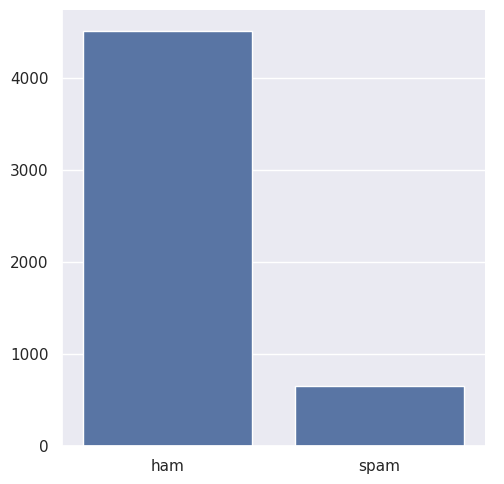

In [ ]:
classes=list(df["label"].value_counts().index)
valu =list(df["label"].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=valu,kind="bar")
plt.show()

In [ ]:
df["label"].value_counts()

,count
label,
ham,4518
spam,653


In [ ]:
df.sample(2000)

,mail_message,label
4979,jade its paul y didn t u txt me do u remembe...,ham
5242,gud gud k chikku tke care sleep well gud nyt,ham
5059,geeeee your internet is really bad today ...,ham
2963,none nowhere ikno doesdiscount shitinnit,ham
4579,urgent call from your landline y...,spam
...,...,...
3071,i m now but have to wait till for the bus to...,ham
2868,mum i ve sent you many many messages since i ...,ham
4243,show ur colours euro offer get an...,spam
286,k i might come by tonight then if my class le...,ham


In [ ]:
ham=df[df["label"]=="ham"].sample(2000)
spam=df[df["label"]=="spam"]
df=pd.concat([ham,spam])
df["label"].value_counts()

,count
label,
ham,2000
spam,653


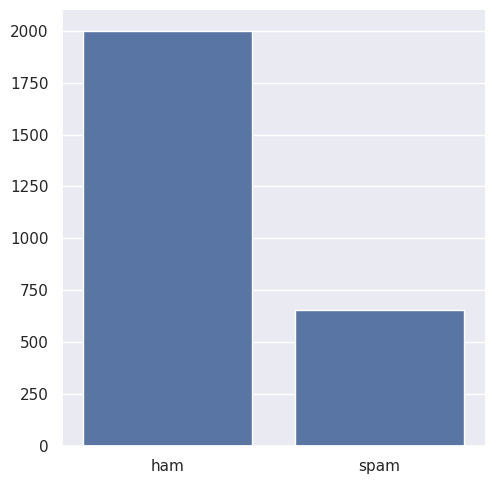

In [ ]:
classes=list(df["label"].value_counts().index)
valu =list(df["label"].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=valu,kind="bar")
plt.show()

In [ ]:
df["label"]=df["label"].map({"ham":0,"spam":1})

df.head()

,mail_message,label
1879,i am at a party with alex nichols,0
1440,in fact when do you leave i think addie goes ...,0
3711,are you in town this is v important,0
1896,uh heads up we don t have that much left,0
4002,he s just gonna worry for nothing and he won ...,0


In [ ]:
x=df["mail_message"]
y=df["label"]

In [ ]:
BOW_obj = CountVectorizer(
    max_features=2000,
    stop_words="english"
)
x_transformed=BOW_obj.fit_transform(x)
x_transformed.shape

(2653, 2000)

In [ ]:
dense_matrix=x_transformed.toarray()
dense_matrix.shape

(2653, 2000)

In [ ]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(dense_matrix,y,test_size=0.2)

In [ ]:
# using multinomial naive bayes
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
model.score(x_test,y_test)

0.9792843691148776

In [ ]:
pred=model.predict(x_test)
pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,